In [1]:
%matplotlib inline

In [22]:
from __future__ import division

import sys


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn import svm

import entrainment_pred

In [3]:
full_atw = pd.read_csv("data/step3/full_atw.csv")

In [5]:
_, target_cols = entrainment_pred.separate_cols(full_atw)

In [6]:
target_cols

{'atw_z', 'pd_atw', 'pd_atw_z', 'se_atw', 'se_atw_z'}

In [38]:
search_atw = entrainment_pred.run(full_atw, 'atw_z', c_range_alpha=.05)

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [47]:
search_atw.best_score_

0.038455916804051686

In [49]:
search_atw.grid_scores_

[mean: 0.01386, std: 0.39676, params: {'svr__C': 0.00065412528115098571},
 mean: 0.01384, std: 0.39679, params: {'svr__C': 0.0054144997409610674},
 mean: 0.01385, std: 0.39676, params: {'svr__C': 0.00015804943666600848},
 mean: -0.13734, std: 0.23972, params: {'svr__C': 5.2457502758717706e-16},
 mean: 0.01385, std: 0.39677, params: {'svr__C': 0.079364909658904428},
 mean: 0.03846, std: 0.39213, params: {'svr__C': 1.516260440152489e-05},
 mean: 0.01385, std: 0.39677, params: {'svr__C': 0.24594294230685967},
 mean: -0.13734, std: 0.23972, params: {'svr__C': 3.6944545693958965e-13},
 mean: -0.13734, std: 0.23972, params: {'svr__C': 2.3296557804888575e-14},
 mean: 0.01385, std: 0.39674, params: {'svr__C': 0.0033708508336282839}]

In [43]:
full_adw = pd.read_csv("data/step3/full_adw.csv")
search_adw = entrainment_pred.run(full_adw, 'adw_z', c_range_alpha=.1)
search_adw.best_score_

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

0.092967528422199658

In [50]:
search_adw.grid_scores_

[mean: 0.09297, std: 0.35883, params: {'svr__C': 0.00065412528115098571},
 mean: 0.09295, std: 0.35885, params: {'svr__C': 0.0054144997409610674},
 mean: 0.09293, std: 0.35887, params: {'svr__C': 0.00015804943666600848},
 mean: -0.15939, std: 0.19151, params: {'svr__C': 5.2457502758717706e-16},
 mean: 0.09294, std: 0.35888, params: {'svr__C': 0.079364909658904428},
 mean: 0.05809, std: 0.40943, params: {'svr__C': 1.516260440152489e-05},
 mean: 0.09296, std: 0.35882, params: {'svr__C': 0.24594294230685967},
 mean: -0.15939, std: 0.19151, params: {'svr__C': 3.6944545693958965e-13},
 mean: -0.15939, std: 0.19151, params: {'svr__C': 2.3296557804888575e-14},
 mean: 0.09295, std: 0.35887, params: {'svr__C': 0.0033708508336282839}]

### Calculate Coefficients and Plot Closeness to Fit

In [10]:
def calc_coeffs(best_estimator, cv, data, target):

    def _calc_coeffs(predicted_hist):
        n_iter = cv.n_iter
        print('-' * n_iter)

        svr = best_estimator.named_steps['svr']
        def fit(train):
            best_estimator.fit(data.iloc[train], target.iloc[train])

        def predict(test):
            predicted = best_estimator.predict(data.iloc[test]).tolist()
            for i in test:
                predicted_hist[i].append(predicted.pop(0))

        def coeffs_fn():
            sys.stdout.write('#')
            return svr.coef_.copy()

        coeffs = entrainment_pred.calc_coeffs(cv, fit, coeffs_fn, predict)
        return coeffs, predicted_hist
    
    return _calc_coeffs({i:[] for i in range(len(target))})
    

In [44]:
data_adw, target_adw = entrainment_pred.separate(full_adw, 'adw_z')
coeffs_adw, predict_hist_adw = calc_coeffs(search_adw.best_estimator_, search_adw.cv, 
                                           data_adw, target_adw)

----------------------------------------------------------------------------------------------------
####################################################################################################

In [12]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)

def plot(predict_hist, target, title, sort=True, agg=np.mean, save=True):
    x = range(len(target))
    pmns = np.array([agg(predict_hist[i]) for i in range(len(predict_hist))])
    
    plt_indices = np.argsort(target) if sort else x
    
    plt.scatter(x, pmns[plt_indices], c='y')
    p = plt.plot(target.get_values()[plt_indices], marker='*')
    plt.title(title)
    plt.legend(["truth", "mean pred."], bbox_to_anchor=[.9, 1.0])
    msg = 'corr: %.2f' % np.corrcoef(pmns, target.get_values())[0][1]
    plt.text(.6, .95, msg, verticalalignment='top', fontsize=12, 
         horizontalalignment='right', transform=p[0].axes.transAxes)
    
    if save:
        plt.savefig(title + '.jpg')

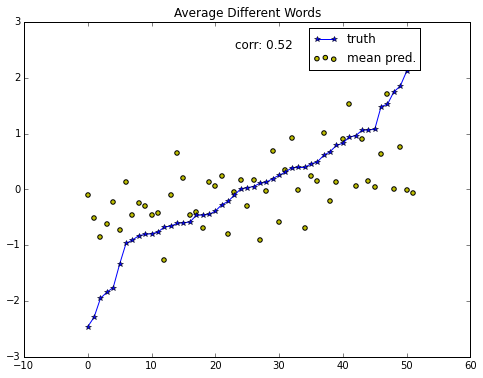

In [45]:
plot(predict_hist_adw, target_adw, 'Average Different Words')

In [40]:
data_atw, target_atw = entrainment_pred.separate(full_atw, 'atw_z')
coeffs_atw, predict_hist_atw = calc_coeffs(search_atw.best_estimator_, search_atw.cv, data_atw, target_atw)

----------------------------------------------------------------------------------------------------
####################################################################################################

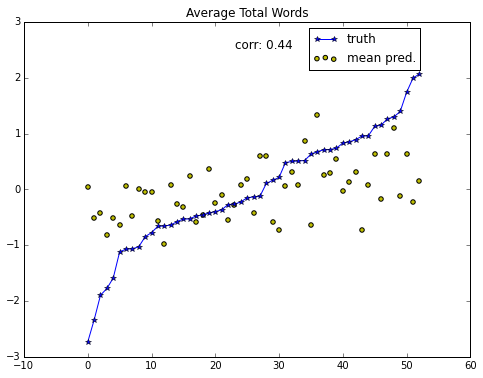

In [41]:
plot(predict_hist_atw, target_atw, 'Average Total Words')

In [46]:
search_adw.grid_scores_

[mean: 0.09297, std: 0.35883, params: {'svr__C': 0.00065412528115098571},
 mean: 0.09295, std: 0.35885, params: {'svr__C': 0.0054144997409610674},
 mean: 0.09293, std: 0.35887, params: {'svr__C': 0.00015804943666600848},
 mean: -0.15939, std: 0.19151, params: {'svr__C': 5.2457502758717706e-16},
 mean: 0.09294, std: 0.35888, params: {'svr__C': 0.079364909658904428},
 mean: 0.05809, std: 0.40943, params: {'svr__C': 1.516260440152489e-05},
 mean: 0.09296, std: 0.35882, params: {'svr__C': 0.24594294230685967},
 mean: -0.15939, std: 0.19151, params: {'svr__C': 3.6944545693958965e-13},
 mean: -0.15939, std: 0.19151, params: {'svr__C': 2.3296557804888575e-14},
 mean: 0.09295, std: 0.35887, params: {'svr__C': 0.0033708508336282839}]

In [42]:
search_atw.grid_scores_

[mean: 0.01386, std: 0.39676, params: {'svr__C': 0.00065412528115098571},
 mean: 0.01384, std: 0.39679, params: {'svr__C': 0.0054144997409610674},
 mean: 0.01385, std: 0.39676, params: {'svr__C': 0.00015804943666600848},
 mean: -0.13734, std: 0.23972, params: {'svr__C': 5.2457502758717706e-16},
 mean: 0.01385, std: 0.39677, params: {'svr__C': 0.079364909658904428},
 mean: 0.03846, std: 0.39213, params: {'svr__C': 1.516260440152489e-05},
 mean: 0.01385, std: 0.39677, params: {'svr__C': 0.24594294230685967},
 mean: -0.13734, std: 0.23972, params: {'svr__C': 3.6944545693958965e-13},
 mean: -0.13734, std: 0.23972, params: {'svr__C': 2.3296557804888575e-14},
 mean: 0.01385, std: 0.39674, params: {'svr__C': 0.0033708508336282839}]

(0.99999998848915606, 0.092959472790320061)

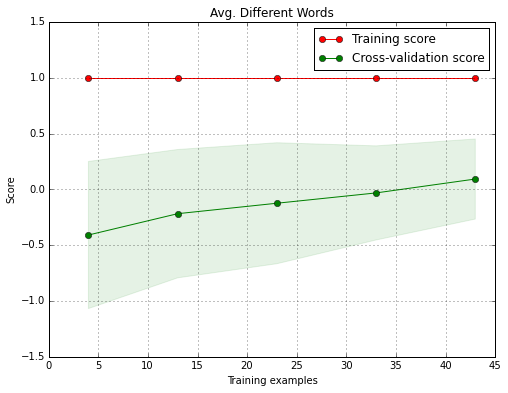

In [25]:
entrainment_pred.plot_learning_curve(search_adw.best_estimator_, "Avg. Different Words", data_adw, target_adw,
                                    cv=search_adw.cv)

(0.99999998687780589, 0.013849299114609309)

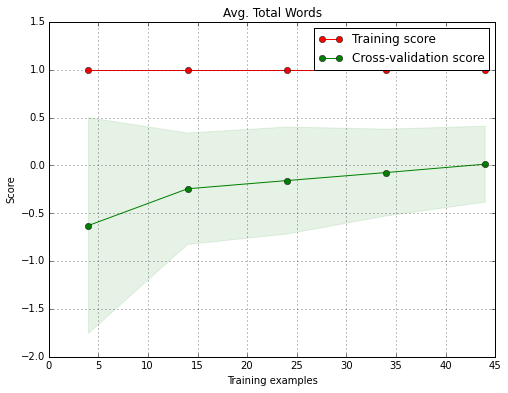

In [26]:
entrainment_pred.plot_learning_curve(search_atw.best_estimator_, "Avg. Total Words", data_atw, target_atw,
                                    cv=search_atw.cv)

In [27]:
old_c = search_adw.best_params_

In [28]:
old_c

{'svr__C': 0.83741408723241606}

(0.99999998859805916, 0.14434024327730596)

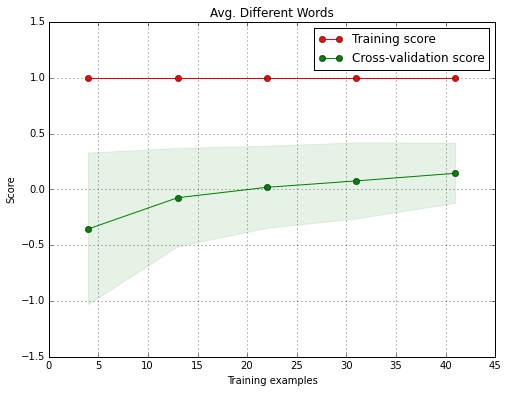

In [51]:
svr = sklearn.svm.LinearSVR(C=1e6)
search_adw.cv.n = 50

entrainment_pred.plot_learning_curve(svr, "Avg. Different Words", data_adw, target_adw,
                                    cv=search_adw.cv)

### Run Classification

In [54]:
search_adw_c = entrainment_pred.run_class(full_adw, 'adw_z', c_range_alpha=.05)
search_adw_c.best_score_

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6625722610722613

In [56]:
search_adw_c.grid_scores_

[mean: 0.63805, std: 0.15802, params: {'svc__C': 4.2787988344085613e-07},
 mean: 0.64536, std: 0.16520, params: {'svc__C': 0.098454657585896929},
 mean: 0.54439, std: 0.21746, params: {'svc__C': 2.4979624430442624e-08},
 mean: 0.51950, std: 0.24474, params: {'svc__C': 2.7517895956808754e-31},
 mean: 0.64536, std: 0.16520, params: {'svc__C': 0.0062987888851660616},
 mean: 0.51950, std: 0.24474, params: {'svc__C': 2.2990457223714196e-10},
 mean: 0.64536, std: 0.16520, params: {'svc__C': 0.060487930870555311},
 mean: 0.51950, std: 0.24474, params: {'svc__C': 1.364899456533022e-25},
 mean: 0.51950, std: 0.24474, params: {'svc__C': 5.4272960555651469e-28},
 mean: 0.66257, std: 0.17340, params: {'svc__C': 1.1362635342572497e-05}]